In [1]:
import numpy as np
import seaborn as sns
import scipy.signal as signal
import matplotlib.pyplot as plt
import pprint
import json

## Analysis
The purpose of this Jupyter notebook is to help with fine-tuning the peak detection mechanism, etc, which requires a human to look over the data. All of the preprocessing is done in `interferometry.py`.

In [2]:
with open("trials.json", "r") as f:
    metadata = json.load(f)

In [3]:
def moving_mean(x_array, N):
    window = np.cumsum(np.insert(x_array, 0, 0)) 
    return (window[N:] - window[:-N]) / float(N)

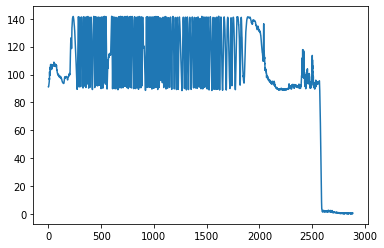

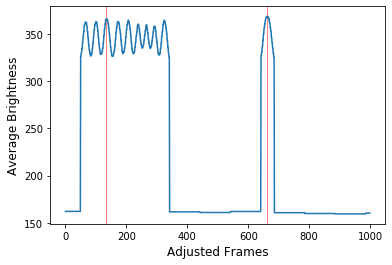

Trial 6
Data points: 1000
Peaks: 3


In [32]:
y_data = np.load("dataset.pickle.npy", allow_pickle=True)
results = []
for count, each_trial in enumerate(y_data):
    trial_results = {}
    trial = count + 1
    if trial != 6:
        continue
#     print(each_trial)
    plt.plot(each_trial)
    plt.show()
    plt.close()
    x = [x for x in range(len(each_trial))]
    mean = moving_mean(each_trial, 9)
    weighted_normalization = moving_mean(each_trial, 100).tolist()
    average = np.average(each_trial)
    weighted_mean = [x + average - 0.4*x*weighted_normalization[count*(len(weighted_normalization)//len(mean))]//average for count, x  in enumerate(mean.tolist())]

    average_weight = np.average(weighted_mean)

    stretched_weighted_mean = []
    for each_x in weighted_mean:
        if each_x <= average_weight:
            for i in range(100):
                stretched_weighted_mean.append(each_x)
        else:
            for i in range(2):
                stretched_weighted_mean.append(each_x*2)
#     x = 2
#     stretched_weighted_mean = stretched_weighted_mean[round((x*len(stretched_weighted_mean)/100)):round(((x+100)*len(stretched_weighted_mean)/100))]
    try:
        stretched_weighted_mean = stretched_weighted_mean[22000:23000]
    except:
        pass
    
    peaks = signal.find_peaks(stretched_weighted_mean, width=2, distance=200,prominence=4, wlen = 150)[0].tolist()
    # peaks = signal.find_peaks(mean, width=1, distance=2, wlen = 10)[0].tolist()
    # peaks = signal.find_peaks(weighted_mean, width=5, distance=30, prominence = 1, wlen = 100)[0].tolist()
    for count, each_peak in enumerate(peaks):
        plt.axvspan(abs(each_peak-0.1), each_peak+0.1, color='red', alpha=0.5)

    # plt.plot(signal.savgol_filter(each_trial, 55, 1))
    # plt.plot(moving_mean(each_trial, 10))
    # plt.plot(mean)
    # plt.plot(weighted_mean)
    try:
        plt.plot(stretched_weighted_mean)
        plt.xlabel('Adjusted Frames', fontsize=12)
        plt.ylabel('Average Brightness', fontsize=12)
        plt.savefig("6_bad.svg")
        plt.show()

        plt.close()
        # plt.plot(each_trial)
        trial_results["trial"] = trial
        trial_results["points"] = len(stretched_weighted_mean)
        trial_results["peaks"] = len(peaks) + metadata[str(trial)]["add"]
        trial_results["lambda"] = 25*2000/len(peaks)

        print("Trial", trial_results["trial"])
        print("Data points:", trial_results["points"])
        print("Peaks:", trial_results["peaks"])
        results.append(trial_results)
    except:
        pass

In [6]:
pprint.pprint(results)

[{'lambda': 555.5555555555555, 'peaks': 92, 'points': 128696, 'trial': 1},
 {'lambda': 561.7977528089888, 'peaks': 91, 'points': 97770, 'trial': 2},
 {'lambda': 892.8571428571429, 'peaks': 58, 'points': 88906, 'trial': 3},
 {'lambda': 1282.051282051282, 'peaks': 40, 'points': 54812, 'trial': 4},
 {'lambda': 561.7977528089888, 'peaks': 90, 'points': 126070, 'trial': 5},
 {'lambda': 1562.5, 'peaks': 33, 'points': 107970, 'trial': 6},
 {'lambda': 684.931506849315, 'peaks': 74, 'points': 86738, 'trial': 7},
 {'lambda': 617.283950617284, 'peaks': 85, 'points': 112478, 'trial': 8},
 {'lambda': 555.5555555555555, 'peaks': 91, 'points': 107566, 'trial': 9},
 {'lambda': 526.3157894736842, 'peaks': 97, 'points': 141056, 'trial': 10},
 {'lambda': 568.1818181818181, 'peaks': 89, 'points': 122474, 'trial': 11},
 {'lambda': 555.5555555555555, 'peaks': 91, 'points': 229246, 'trial': 12},
 {'lambda': 515.4639175257732, 'peaks': 98, 'points': 241398, 'trial': 13},
 {'lambda': 480.7692307692308, 'peaks'